In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the dataset into python environment

In [3]:
data = pd.read_csv(r'C:\Users\shabn\Downloads\titanic_dataset.csv')

In [4]:
# 2. Make ‘PassengerId’ as the index column

In [5]:
data.set_index("PassengerId", inplace = True)

In [6]:
# 3. Check the basic details of the dataset

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# 4. Fill in all the missing values present in all the columns in the dataset

In [23]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
cols_selected = data[['Age', 'Cabin', 'Embarked']]

In [27]:
cols_selected.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [29]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [31]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [33]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [35]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [37]:
# 5. Check and handle outliers in at least 3 columns in the dataset

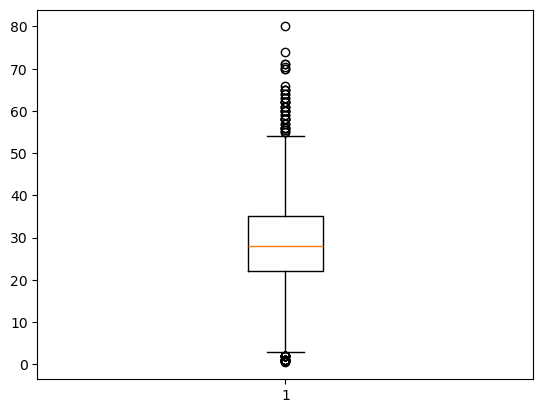

In [39]:
plt.boxplot(data['Age'])
plt.show()

In [41]:
Q1 = np.percentile(data['Age'],25)
Q1

22.0

In [43]:
Q3 = np.percentile(data['Age'],75)
Q3

35.0

In [45]:
IQR = Q3-Q1
IQR

13.0

In [47]:
lower_limit = Q1 - 1.5*IQR
lower_limit

2.5

In [49]:
upper_limit = Q3 + 1.5*IQR
upper_limit

54.5

In [51]:
outlier = []
for x in data['Age']:
    if x<lower_limit or x>upper_limit:
        outlier.append(x)

In [53]:
data = data.drop(data[data['Age']>upper_limit].index)

In [55]:
data.shape

(849, 11)

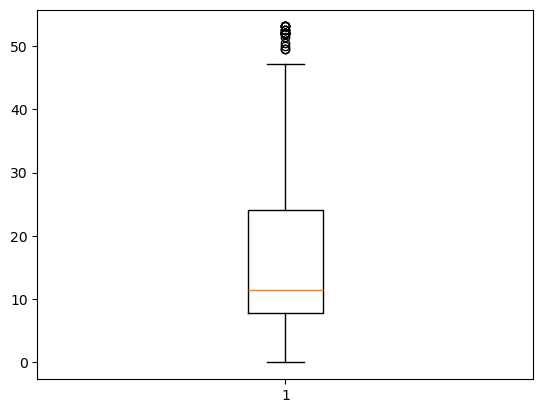

In [69]:
#Fare
plt.boxplot(data['Fare'])
plt.show()

In [71]:
outlier = []
for x in data['Fare']:
    if x<lower_limit or x>upper_limit:
        outlier.append(x)

In [73]:
data = data.drop(data[data['Fare']>upper_limit].index)

In [75]:
data.shape

(719, 11)

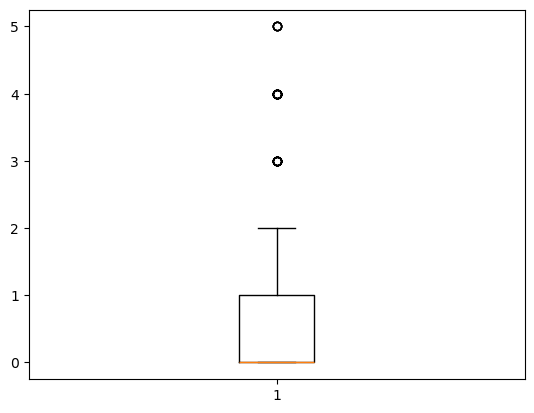

In [77]:
#Sibsp
plt.boxplot(data['SibSp'])
plt.show()

In [79]:
outlier = []
for x in data['Fare']:
    if x<lower_limit or x>upper_limit:
        outlier.append(x)

In [81]:
data = data.drop(data[data['Age']>upper_limit].index)

In [83]:
data.shape

(719, 11)

In [85]:
# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [87]:
X = data[['Pclass','Sex','Age','SibSp','Parch']]
y = data['Survived']

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #X['sex_encoded'] = le.fit_transform(X['sex'])

X.loc[:, 'sex_encoded'] = le.fit_transform(X['Sex'])
X_copy = X.copy()
X_copy['sex_encoded'] = le.fit_transform(X['Sex']) 

C:\Users\shabn\AppData\Local\Temp\ipykernel_5848\312644858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'sex_encoded'] = le.fit_transform(X['Sex'])


In [90]:
X = X.drop('Sex', axis = 1)

In [93]:
X.head()

,Pclass,Age,SibSp,Parch,sex_encoded
PassengerId,,,,,
1,3,22.0,1,0,1
3,3,26.0,0,0,0
4,1,35.0,1,0,0
5,3,35.0,0,0,1
6,3,28.0,0,0,1


In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=['Pclass','Age','SibSp','Parch','Sex'])

In [97]:
X_scaled

,Pclass,Age,SibSp,Parch,Sex
0,1.0,0.402762,0.2,0.000000,1.0
1,1.0,0.477417,0.0,0.000000,0.0
2,0.0,0.645390,0.2,0.000000,0.0
3,1.0,0.645390,0.0,0.000000,1.0
4,1.0,0.514744,0.0,0.000000,1.0
...,...,...,...,...,...
714,0.5,0.496081,0.0,0.000000,1.0
715,0.0,0.346771,0.0,0.000000,0.0
716,1.0,0.514744,0.2,0.333333,0.0
717,0.0,0.477417,0.0,0.000000,1.0
